In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

In [22]:
df=sns.load_dataset('titanic')
df=df[['survived','age','fare']]
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [24]:
df['age']=df['age'].fillna(df['age'].mean())

In [25]:
x=df.drop('survived',axis=1)
y=df['survived']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

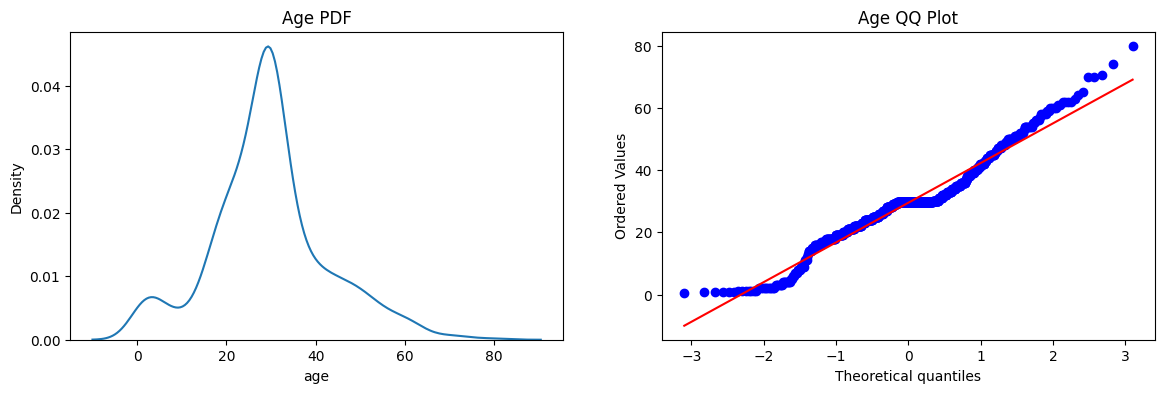

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

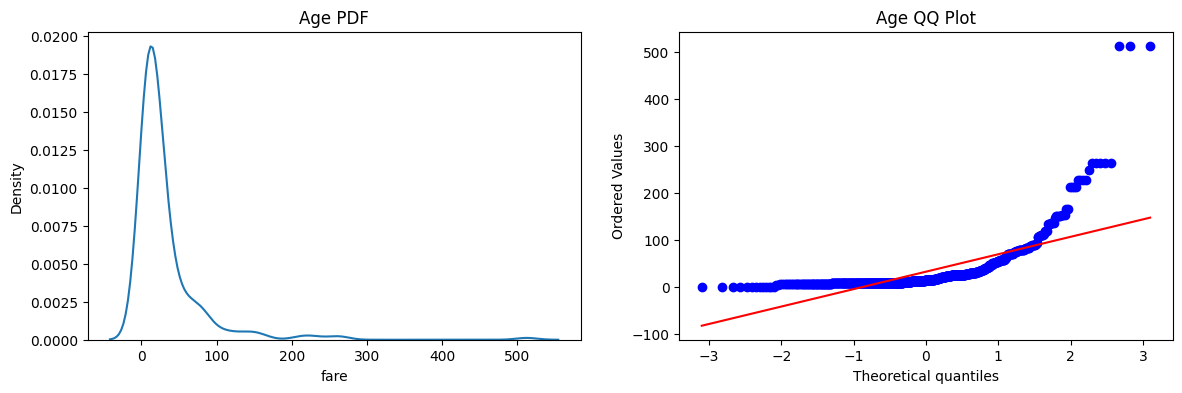

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x_train['fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [31]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)
y_pred=model_1.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6480446927374302


In [33]:
model_2=DecisionTreeClassifier()
model_2.fit(x_train,y_train)
y_pred=model_2.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6536312849162011


# After function transformer

In [35]:
trf = FunctionTransformer(func=np.log1p)
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

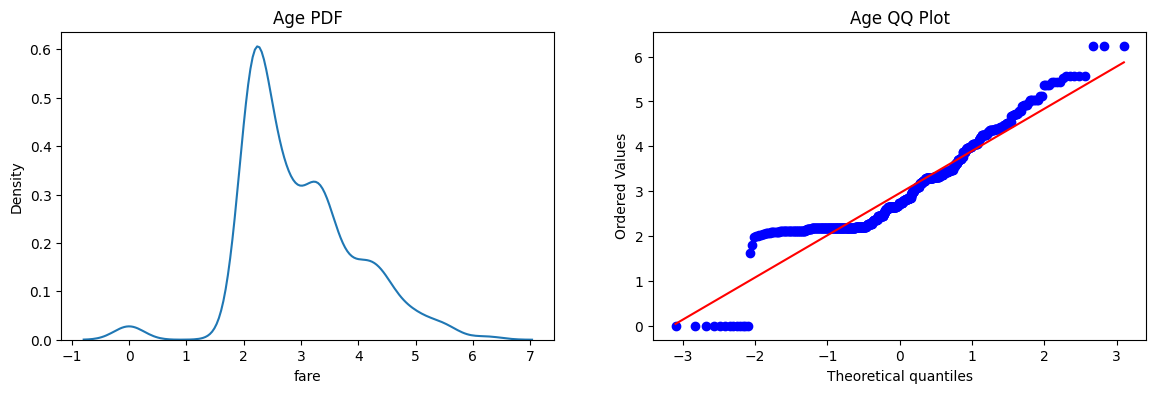

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x_train_trf['fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train_trf['fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

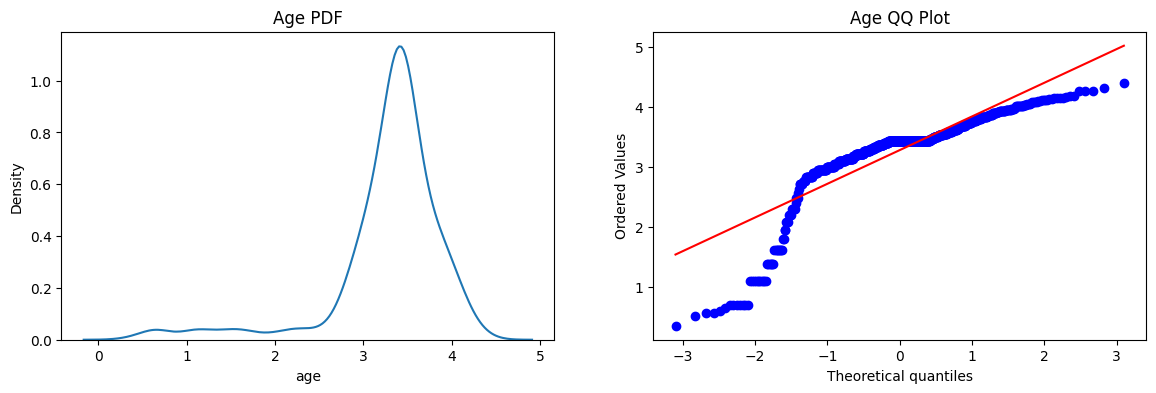

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x_train_trf['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train_trf['age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [38]:
model_1=LogisticRegression()
model_1.fit(x_train_trf,y_train)
y_pred=model_1.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7374301675977654


In [39]:
model_2=DecisionTreeClassifier()
model_2.fit(x_train_trf,y_train)
y_pred=model_2.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5865921787709497
